## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
#Let's take a look at the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### There are alot of variables, so let's see if we can eliminate some of them based on correlation.



In [3]:
#Create a copy of the df, then drop id variable
df_copy = df
df_copy.drop(['id', "date"], axis = 1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


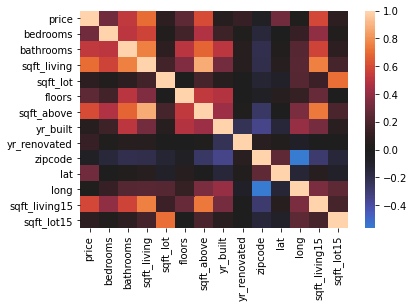

In [4]:
#Then modify df to not include the target variable price, then let's create a heatmap to see the strength of correlations. 
df_copy = df_copy.iloc[:, 1:21]
sns.heatmap(df_copy.corr(), center = 0);

### Looking at the heatmap correlation strengths, we can eliminate some of the variables/columns in our original DF: 

* **date (not in heatmap, but we're worried about future dates not the past**
* **sqft_lot**
* **view**
* **sqft_above**
* **sqft_basement**
* **yr_renovated**
* **zipcode**
* **lat**
* **long**
* **sqft_living15**
* **sqft_lot15**

In [5]:
#Dropping the above mentioned columns

df = df.drop(columns = ["date", "sqft_lot", "view", "sqft_above", "sqft_basement", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"])

In [6]:
#Let's take another look at the DF and check for duplicates

df.info()
df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2.0,NaN,Average,8 Good,2004


price          3622
bedrooms         12
bathrooms        29
sqft_living    1034
floors            6
yr_built        116
dtype: int64

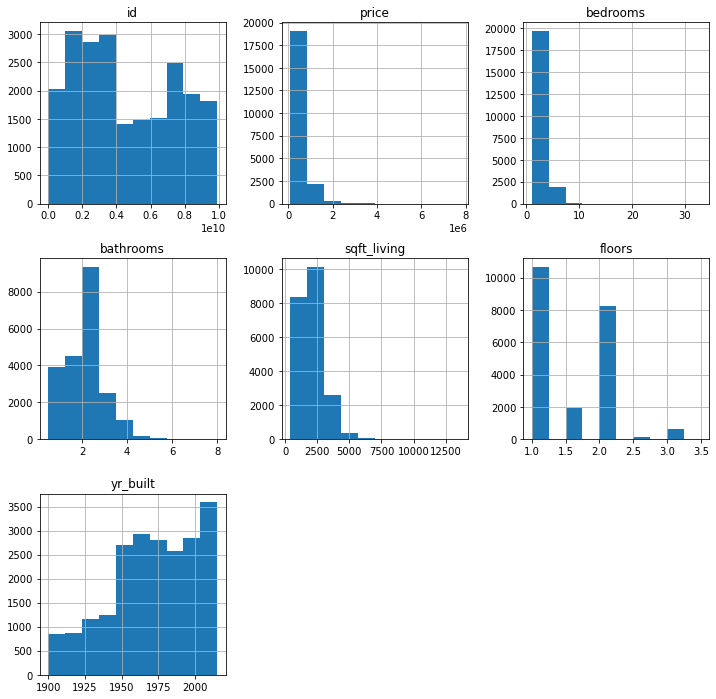

In [7]:
#Let's double check for any disguised categorical variables other than our obvious ones


df.hist(figsize = (12,12));

df[["price", "bedrooms", "bathrooms", "sqft_living", "floors", "yr_built"]].nunique()

Doesn't seem to be anything out of the ordinary, so let's take a look at our actual categorical variables

## 1. The waterfront variable ##

In [8]:
df["waterfront"].unique()


array([nan, 'NO', 'YES'], dtype=object)

In [9]:
#As we can see there are 3 values in the waterfont column: null, "NO", and "YES"
#Let's drop the null values in waterfront and just keep the "YES" or "NO" values#

df.dropna(subset = ["waterfront"], inplace = True)

In [10]:
#Let's check it worked
df["waterfront"].unique()

array(['NO', 'YES'], dtype=object)

In [11]:
#Let's convert the waterfront values into numerical categories where 0 represents "NO" and 1 represents "YES"

df["waterfront"] = df["waterfront"].astype("category").cat.codes
#Let's check it worked
df

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,2.0,0,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,1.0,0,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,1.0,0,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,1.0,0,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,1.0,0,Average,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,2.0,0,Average,8 Good,2008
21592,263000018,360000.0,3,2.50,1530,3.0,0,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,2.0,0,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,2.0,0,Average,7 Average,2009


## 2. The condition variable

In [12]:
df["condition"].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [13]:
#No null values here, so let's do the same thing as we did with waterfront

df["condition"] = df["condition"].astype("category").cat.codes
df["condition"].unique()

array([0, 4, 2, 3, 1], dtype=int8)

In [14]:
df

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,2570,2.0,0,0,7 Average,1951
2,5631500400,180000.0,2,1.00,770,1.0,0,0,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,1.0,0,4,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,1.0,0,0,8 Good,1987
5,7237550310,1230000.0,4,4.50,5420,1.0,0,0,11 Excellent,2001
...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,2.0,0,0,8 Good,2008
21592,263000018,360000.0,3,2.50,1530,3.0,0,0,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,2.0,0,0,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,2.0,0,0,7 Average,2009


## 3. The grade variable ##

In [15]:
df["grade"].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [16]:
#We only want the number scores, and not the description.
#Let's create a function to edit the string entries
def keep_numbs(string):
    new_string = ''
    for i in string:
        if i.isdigit():
            new_string = new_string + i
    return new_string

In [17]:
df["grade"] = df["grade"].apply(keep_numbs)
df["grade"] = pd.to_numeric(df["grade"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19221 non-null  int64  
 1   price        19221 non-null  float64
 2   bedrooms     19221 non-null  int64  
 3   bathrooms    19221 non-null  float64
 4   sqft_living  19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  int8   
 7   condition    19221 non-null  int8   
 8   grade        19221 non-null  int64  
 9   yr_built     19221 non-null  int64  
dtypes: float64(3), int64(5), int8(2)
memory usage: 1.4 MB
